# Create a Summary View of My Last Running Activity

In [1]:
from garmindb import ConfigManager
import fitfile
from garmindb.garmindb import (
    Activities,
    ActivitiesDb,
    Attributes,
    GarminDb,
    garmin_summary_db,
)
from IPython.display import display_markdown

In [2]:
# Local import
from garmin_analysis.running_activity import RunningActivity

In [3]:
db_params_dict = ConfigManager.get_db_params()

garmin_db = GarminDb(db_params_dict)
garmin_summary_db = garmin_summary_db.GarminSummaryDb(db_params_dict)
garmin_act_db = ActivitiesDb(db_params_dict)
measurement_system = Attributes.measurements_type(garmin_db)
unit_strings = fitfile.units.unit_strings[measurement_system]
distance_units = {"kilometers": "km"}[
    unit_strings[fitfile.units.UnitTypes.distance_long]
]

In [4]:
running_activities = Activities.get_by_sport(garmin_act_db, "running")

In [5]:
last_running_activity = RunningActivity(running_activities[-1])

## Pretty Print a table with basic running workout data

In [6]:
display_markdown(str(last_running_activity.get_activity_summary_markdown()), raw=True)

| VARIABLE                  | VAL            |
| :------------------------ | -------------: |
| id                        | 11223174767    |
| name                      | Boston Running |
| distance                  | 8.22 km        |
| aerobic_training_effect   | 3.3            |
| anaerobic_training_effect | 2.1            |
| start_time                | 08:52          |
| stop_time                 | 09:39          |
| moving_time               | 00:45:00       |
| avg_pace                  | 5:29 min/km    |
| avg_hr                    | 149            |
| max_hr                    | 180            |
| pct_zone_1                | 10.1%          |
| pct_zone_2                | 40.6%          |
| pct_zone_3                | 19.1%          |
| pct_zone_4                | 16.1%          |
| pct_zone_5                | 14.1%          |

In [7]:
# in Markdown, as I need that for another app

In [8]:
print(last_running_activity.get_activity_summary_markdown())

| VARIABLE                  | VAL            |
| :------------------------ | -------------: |
| id                        | 11223174767    |
| name                      | Boston Running |
| distance                  | 8.22 km        |
| aerobic_training_effect   | 3.3            |
| anaerobic_training_effect | 2.1            |
| start_time                | 08:52          |
| stop_time                 | 09:39          |
| moving_time               | 00:45:00       |
| avg_pace                  | 5:29 min/km    |
| avg_hr                    | 149            |
| max_hr                    | 180            |
| pct_zone_1                | 10.1%          |
| pct_zone_2                | 40.6%          |
| pct_zone_3                | 19.1%          |
| pct_zone_4                | 16.1%          |
| pct_zone_5                | 14.1%          |


## Create a Map with markers for each 

In [9]:
last_running_activity.create_map()

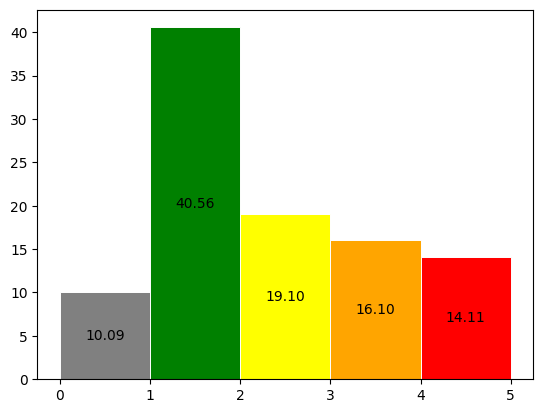

In [10]:
last_running_activity.create_zone_plot()